## Variáveis aleatórias

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
np.random.seed(1)

### Simulação de um lançamento de dois dados 

In [2]:
dice = pd.DataFrame(range(1,7))
dice

,0
0,1
1,2
2,3
3,4
4,5
5,6


In [5]:
for i in range(10):
    sum_of_dice = dice.sample(2, replace=True).sum().loc[0]
    print(f'Sum of dice is {sum_of_dice:>2d}.')

Sum of dice is  5.
Sum of dice is  2.
Sum of dice is  7.
Sum of dice is 10.
Sum of dice is  9.
Sum of dice is  6.
Sum of dice is  2.
Sum of dice is  6.
Sum of dice is  6.
Sum of dice is  3.


In [19]:
trial = 100
result = [dice.sample(2, replace=True).sum().loc[0] for i in range(trial)]
result[:10]

[8, 7, 6, 7, 4, 11, 8, 4, 5, 9]

### Frequência

In [20]:
freq = pd.DataFrame(result)[0].value_counts()
sort_freq = freq.sort_index()
sort_freq

2      2
3      1
4      6
5     12
6     16
7     17
8     22
9     11
10     6
11     4
12     3
Name: 0, dtype: int64

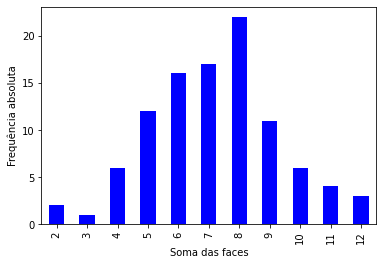

In [22]:
sort_freq.plot(kind='bar', color='blue')
plt.xlabel('Soma das faces')
plt.ylabel('Frequência absoluta')
plt.show()

### Frequência relativa

Text(0.5, 1.0, 'Número de lançamentos: 100')

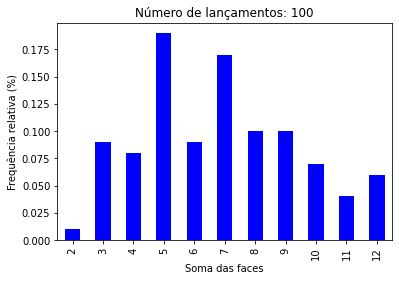

In [28]:
trials = 100
result = [dice.sample(2,replace=True).sum().loc[0] for i in range(trials)]
freq = pd.DataFrame(result)[0].value_counts()
sort_freq = freq.sort_index()
relative_freq = sort_freq / sort_freq.sum()
relative_freq.plot(kind='bar', color='blue')
plt.xlabel('Soma das faces')
plt.ylabel('Frequência relativa (%)')
plt.title("Número de lançamentos: 100")

### Modelos de retorno de ações

In [31]:
aapl = pd.read_csv('../data/apple.csv', index_col=0)
aapl.index = pd.to_datetime(aapl.index, errors='coerce')
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,7.239566,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,7.164135,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,7.289855,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,7.236666,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,7.177672,116739700


<AxesSubplot:xlabel='Date'>

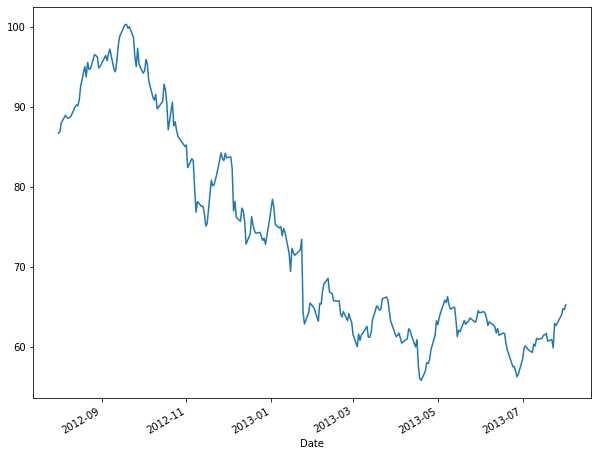

In [33]:
aapl.loc['2012-8-01':'2013-8-01', 'Close'].plot(figsize=(10,8))

O preço das ações da Apple caiu mais de 40% de agosto de 2012 a maio de 2013.

Nesse contexto, desejamos calcular qual a probabilidade de obtermos um retorno anual inferior a 40%.

## Retorno logarítimico diário da Apple

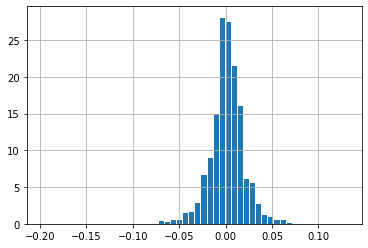

In [56]:
aapl['LogReturn'] = np.log(aapl['Close']).shift(-1) - np.log(aapl['Close'])
aapl['LogReturn'].hist(density=True, bins=50, edgecolor='white')
plt.show()

In [36]:
from scipy.stats import norm

In [37]:
density = pd.DataFrame()
density['x'] = np.arange(-4, 4, 0.001)
density['pdf'] = norm.pdf(density['x'], 0,1)
density['cdf'] = norm.cdf(density['x'], 0,1)

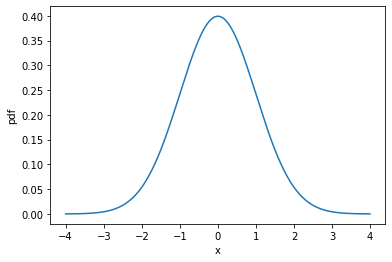

In [39]:
plt.plot(density['x'], density['pdf'])
plt.xlabel('x')
plt.ylabel('pdf')
plt.show()

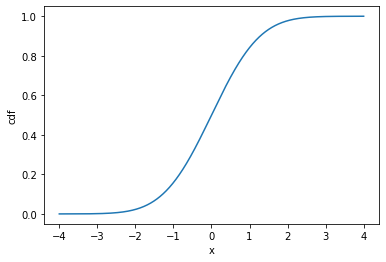

In [40]:
plt.plot(density['x'], density['cdf'])
plt.xlabel('x')
plt.ylabel('cdf')
plt.show()

### Média e variância aproximadas para o retorno log das ações

In [45]:
mu = aapl['LogReturn'].mean()
sigma = aapl['LogReturn'].std(ddof=1)
print(f"Média: {mu:>.6f}, Variância: {sigma:>.6f}")

Média: 0.000975, Variância: 0.020045


In [ ]:
def 

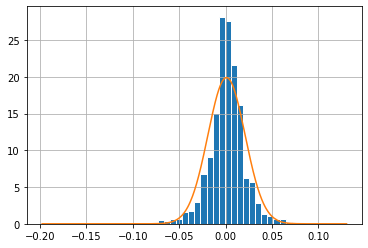

In [144]:
aapl['LogReturn'].hist(density=True, bins=50, edgecolor='white')
x = list(aapl['LogReturn'])
x.sort()
y = norm.pdf(x, mu, sigma)
plt.plot(x,y)
plt.show()

Exemplo:

In [149]:
denApp = pd.DataFrame()
denApp['x'] = np.arange(-0.1, 0.1, 0.001)
denApp['pdf'] = norm.pdf(denApp['x'], mu, sigma)
denApp.head()

,x,pdf
0,-0.100,0.000061
1,-0.099,0.000079
2,-0.098,0.000101
3,-0.097,0.000129
4,-0.096,0.000165


In [169]:
x = np.arange(-0.1, 0.05, 0.0001)
y1 = norm.pdf(np.arange(-0.1, 0.05, 0.0001), mu, sigma)
print(len(x), len(y1))

1501 1501


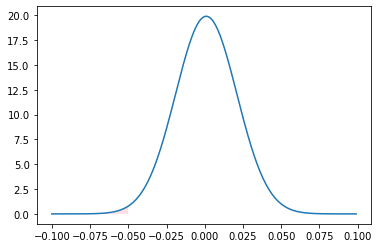

In [178]:
plt.ylim = (0,20)
plt.plot(denApp['x'], denApp['pdf'])
plt.fill_between(x = np.arange(-0.1, -0.05, 0.0001),
                 y2 = 0,
                 y1 = norm.pdf(np.arange(-0.1, -0.05, 0.0001), mu, sigma),
                 facecolor = 'pink',
                 alpha = 0.5)

In [177]:
prob_return1 = norm.cdf(-0.05, mu, sigma)
print(f"A probabilidade de um retorno menor que -5% é {100*prob_return1:>.4f}%.")

A probabilidade de um retorno menor que -5% é 0.5495%.


Qual a probabilidade de o valor das ações da Apple cair mais de 40%  em um ano (220 trading days)?

In [179]:
mu220 = 200 * mu
sigma220 = 220**0.5 * sigma
print(mu220, sigma220)

0.1950935518300176 0.29732203656371786


In [181]:
p40 = norm.cdf(-0.4, mu220, sigma220)
print(f"A probabilidade de uma queda de mais de 40% no preço das ações em 220 dias é: {100*p40:>.5f}%.")

A probabilidade de uma queda de mais de 40% no preço das ações em 220 dias é: 2.26686%.


## Models of Stock Return

In [185]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [183]:
ms = pd.read_csv('../data/microsoft.csv', index_col=0)
ms.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,46.730000,47.439999,46.450001,46.450001,42.848763,21552500
2015-01-02,46.660000,47.419998,46.540001,46.759998,43.134731,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,42.738068,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,42.110783,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,42.645817,29114100


## Distribuition of Log Return

Vamos calcular o retorno logarítmico diário

In [184]:
ms['LogReturn'] = np.log(ms['Close']).shift(-1) - np.log(ms['Close'])

Em seguida, plotamos um histograma mostrando a distribuição dos retornos logarítmicos diários para as ações da Microsoft: 

In [192]:
sturges(len(ms['LogReturn']))

11

In [190]:
def sturges(n):
    return round(1 + 3.3 * np.log10(n))

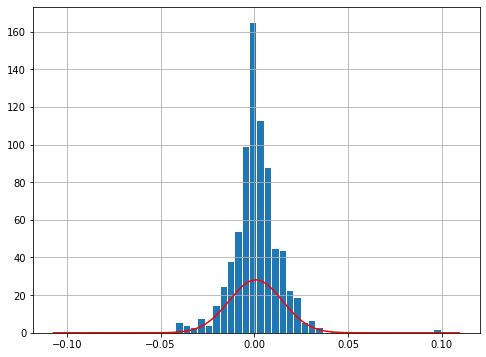

In [197]:
mu = ms['LogReturn'].mean()
sigma = ms['LogReturn'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(ms['LogReturn'].min() - 0.01, ms['LogReturn'].max() + 0.01, 0.0001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

b = sturges(len(ms['LogReturn']))
ms['LogReturn'].hist(bins=50, figsize=(8,6), edgecolor='white')
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

## Calculate the probability of the stock price will drop over a certain percentage in a day

A seguir, calculamos a probabilidade de o preço das ações da Microsoft cair mais de 5% em um dia.

In [198]:
prob_return1 = norm.cdf(-0.05, mu, sigma)
print(f"A probabilidade é {100 * prob_return1:>.4f}%.")

A probabilidade é 0.0171%.


## Calculate the probability of the stock price will drop over a certain percentage in a year

Agora, calcularemos a probabilidade de queda de 40% em um ano, ou seja, em 220 dias de trabalho da bolsa de valores.

In [201]:
drop = -0.4
num_days = 220
mu220 = num_days * mu
sigma220 = (num_days**0.5) * sigma
print(f"A probabilidade de uma queda de {-100*drop:>.0f}% em {num_days} dias é {100*norm.cdf(drop, mu220, sigma220):>.4f}%.")

A probabilidade de uma queda de 40% em 220 dias é 0.2912%.


## Calculate Value at risk (VaR)

In [203]:
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.02252336240706501
